## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  20.123288   550.494036  0.553924  4.193801   305.568016
1  94.180853  1301.793854  0.653959  9.391229   856.439918
2  48.357482   755.751848  0.654670  5.811766   497.168068
3   0.247819  1601.034883  0.915792  3.744102  1466.356643
4  86.470216  1173.842878  0.536845  5.749342   635.870773


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9968169	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9851279	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9740702	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9615142	total: 59ms	remaining: 14.7s
4:	learn: 0.9476839	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9347736	total: 59.9ms	remaining: 9.92s
6:	learn: 0.9214185	total: 60.3ms	remaining: 8.55s
7:	learn: 0.9085133	total: 60.6ms	remaining: 7.52s
8:	learn: 0.8963363	total: 61.1ms	remaining: 6.73s
9:	learn: 0.8829553	total: 61.6ms	remaining: 6.09s
10:	learn: 0.8722857	total: 62ms	remaining: 5.57s
11:	learn: 0.8583494	total: 62.5ms	remaining: 5.14s
12:	learn: 0.8459963	total: 63ms	remaining: 4.78s
13:	learn: 0.8333990	total: 63.5ms	remaining: 4.47s
14:	learn: 0.8211265	total: 64.1ms	remaining: 4.21s
15:	learn: 0.8100162	total: 64.6ms	remaining: 3.97s
16:	learn: 0.7993531	total: 65ms	remaining: 3.76s
17:	learn: 0.7887211	total: 65.3ms	remaining: 3.56s
18:	learn: 0.7800603	total: 65.7ms	remaining: 3.39s


113:	learn: 0.2549193	total: 108ms	remaining: 841ms
114:	learn: 0.2519613	total: 109ms	remaining: 836ms
115:	learn: 0.2491326	total: 109ms	remaining: 830ms
116:	learn: 0.2470525	total: 109ms	remaining: 826ms
117:	learn: 0.2442461	total: 110ms	remaining: 821ms
118:	learn: 0.2419111	total: 110ms	remaining: 817ms
119:	learn: 0.2396542	total: 111ms	remaining: 812ms
120:	learn: 0.2375128	total: 111ms	remaining: 808ms
121:	learn: 0.2347771	total: 112ms	remaining: 803ms
122:	learn: 0.2326979	total: 112ms	remaining: 799ms
123:	learn: 0.2298322	total: 112ms	remaining: 794ms
124:	learn: 0.2279531	total: 113ms	remaining: 788ms
125:	learn: 0.2255735	total: 113ms	remaining: 785ms
126:	learn: 0.2232523	total: 114ms	remaining: 781ms
127:	learn: 0.2213613	total: 114ms	remaining: 778ms
128:	learn: 0.2193120	total: 115ms	remaining: 774ms
129:	learn: 0.2175144	total: 115ms	remaining: 770ms
130:	learn: 0.2153712	total: 116ms	remaining: 766ms
131:	learn: 0.2136157	total: 116ms	remaining: 763ms
132:	learn: 

296:	learn: 0.0611992	total: 185ms	remaining: 437ms
297:	learn: 0.0608315	total: 185ms	remaining: 437ms
298:	learn: 0.0604643	total: 186ms	remaining: 436ms
299:	learn: 0.0601084	total: 186ms	remaining: 435ms
300:	learn: 0.0597716	total: 187ms	remaining: 434ms
301:	learn: 0.0594032	total: 187ms	remaining: 433ms
302:	learn: 0.0591156	total: 188ms	remaining: 432ms
303:	learn: 0.0588225	total: 188ms	remaining: 430ms
304:	learn: 0.0585175	total: 188ms	remaining: 429ms
305:	learn: 0.0582258	total: 189ms	remaining: 428ms
306:	learn: 0.0579380	total: 189ms	remaining: 427ms
307:	learn: 0.0576324	total: 190ms	remaining: 426ms
308:	learn: 0.0572311	total: 190ms	remaining: 425ms
309:	learn: 0.0568824	total: 190ms	remaining: 424ms
310:	learn: 0.0565997	total: 191ms	remaining: 423ms
311:	learn: 0.0563084	total: 191ms	remaining: 422ms
312:	learn: 0.0560382	total: 192ms	remaining: 421ms
313:	learn: 0.0556919	total: 192ms	remaining: 420ms
314:	learn: 0.0554200	total: 193ms	remaining: 419ms
315:	learn: 

532:	learn: 0.0205769	total: 290ms	remaining: 254ms
533:	learn: 0.0204908	total: 290ms	remaining: 253ms
534:	learn: 0.0203818	total: 291ms	remaining: 253ms
535:	learn: 0.0202661	total: 291ms	remaining: 252ms
536:	learn: 0.0201571	total: 292ms	remaining: 252ms
537:	learn: 0.0200728	total: 292ms	remaining: 251ms
538:	learn: 0.0199581	total: 293ms	remaining: 251ms
539:	learn: 0.0198621	total: 293ms	remaining: 250ms
540:	learn: 0.0197496	total: 294ms	remaining: 249ms
541:	learn: 0.0196386	total: 294ms	remaining: 249ms
542:	learn: 0.0195388	total: 295ms	remaining: 248ms
543:	learn: 0.0194294	total: 295ms	remaining: 247ms
544:	learn: 0.0193310	total: 295ms	remaining: 247ms
545:	learn: 0.0192257	total: 296ms	remaining: 246ms
546:	learn: 0.0191310	total: 296ms	remaining: 245ms
547:	learn: 0.0190306	total: 296ms	remaining: 244ms
548:	learn: 0.0189347	total: 297ms	remaining: 244ms
549:	learn: 0.0188372	total: 297ms	remaining: 243ms
550:	learn: 0.0187425	total: 298ms	remaining: 242ms
551:	learn: 

682:	learn: 0.0117432	total: 351ms	remaining: 163ms
683:	learn: 0.0116842	total: 352ms	remaining: 162ms
684:	learn: 0.0116265	total: 352ms	remaining: 162ms
685:	learn: 0.0115628	total: 353ms	remaining: 161ms
686:	learn: 0.0115549	total: 353ms	remaining: 161ms
687:	learn: 0.0115037	total: 353ms	remaining: 160ms
688:	learn: 0.0114501	total: 354ms	remaining: 160ms
689:	learn: 0.0113844	total: 354ms	remaining: 159ms
690:	learn: 0.0113235	total: 355ms	remaining: 159ms
691:	learn: 0.0112661	total: 355ms	remaining: 158ms
692:	learn: 0.0112119	total: 355ms	remaining: 157ms
693:	learn: 0.0111697	total: 356ms	remaining: 157ms
694:	learn: 0.0111145	total: 356ms	remaining: 156ms
695:	learn: 0.0110636	total: 357ms	remaining: 156ms
696:	learn: 0.0110162	total: 358ms	remaining: 156ms
697:	learn: 0.0109599	total: 358ms	remaining: 155ms
698:	learn: 0.0108980	total: 359ms	remaining: 154ms
699:	learn: 0.0108465	total: 359ms	remaining: 154ms
700:	learn: 0.0107996	total: 360ms	remaining: 153ms
701:	learn: 

908:	learn: 0.0057810	total: 456ms	remaining: 45.6ms
909:	learn: 0.0057779	total: 457ms	remaining: 45.1ms
910:	learn: 0.0057747	total: 457ms	remaining: 44.6ms
911:	learn: 0.0057525	total: 457ms	remaining: 44.1ms
912:	learn: 0.0057499	total: 458ms	remaining: 43.6ms
913:	learn: 0.0057370	total: 458ms	remaining: 43.1ms
914:	learn: 0.0057339	total: 458ms	remaining: 42.6ms
915:	learn: 0.0057073	total: 459ms	remaining: 42.1ms
916:	learn: 0.0057004	total: 459ms	remaining: 41.6ms
917:	learn: 0.0056732	total: 460ms	remaining: 41ms
918:	learn: 0.0056706	total: 460ms	remaining: 40.5ms
919:	learn: 0.0056676	total: 460ms	remaining: 40ms
920:	learn: 0.0056460	total: 461ms	remaining: 39.5ms
921:	learn: 0.0056430	total: 461ms	remaining: 39ms
922:	learn: 0.0056221	total: 461ms	remaining: 38.5ms
923:	learn: 0.0055975	total: 462ms	remaining: 38ms
924:	learn: 0.0055945	total: 463ms	remaining: 37.5ms
925:	learn: 0.0055819	total: 463ms	remaining: 37ms
926:	learn: 0.0055563	total: 464ms	remaining: 36.5ms
927

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

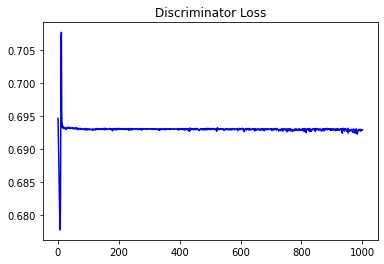

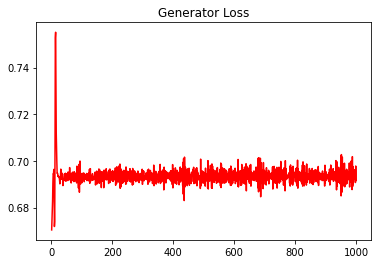

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.006045138194629546


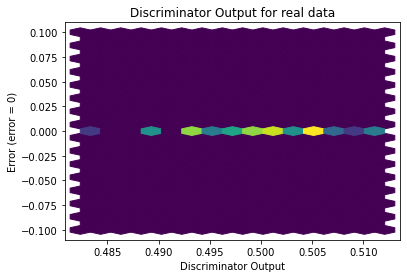

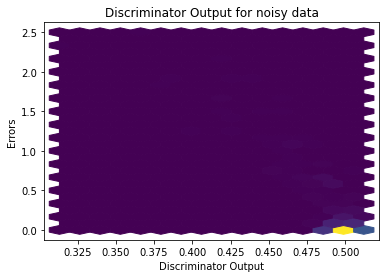

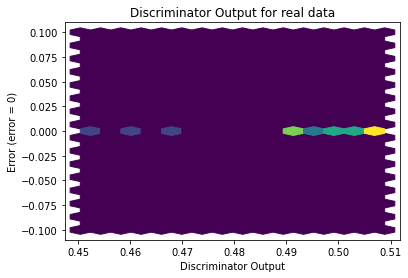

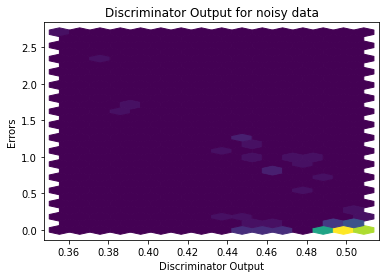

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


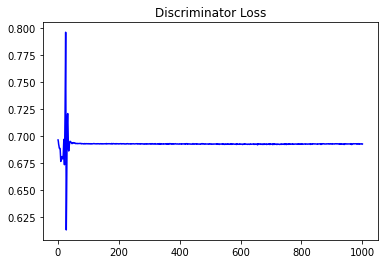

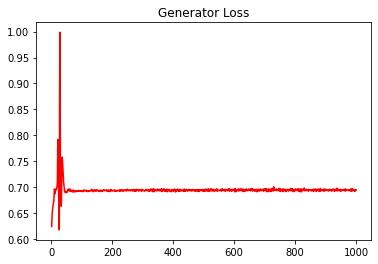

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.003533611222679209


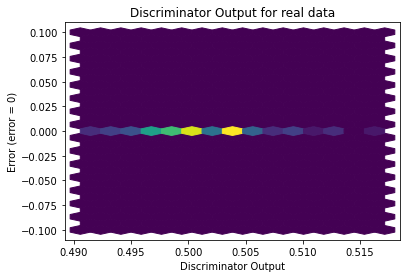

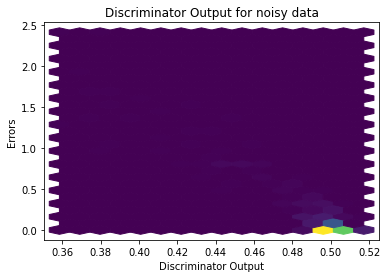

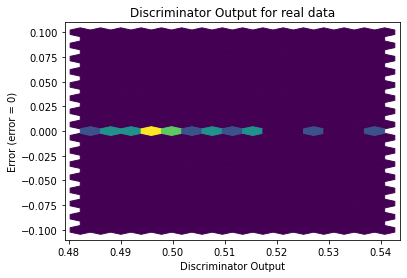

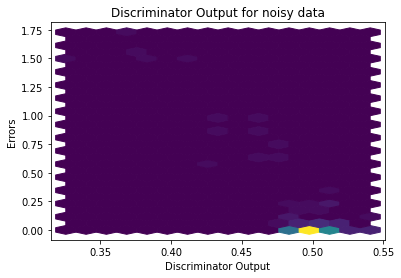

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5082]], requires_grad=True)
